In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [3]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from zipfile import ZipFile

In [8]:
with ZipFile('/content/drive/MyDrive/database.zip','r') as myzip:
  myzip.extractall('/content/drive/MyDrive/database/')

In [23]:
folder_path = "/content/drive/MyDrive/SUFEDB/"

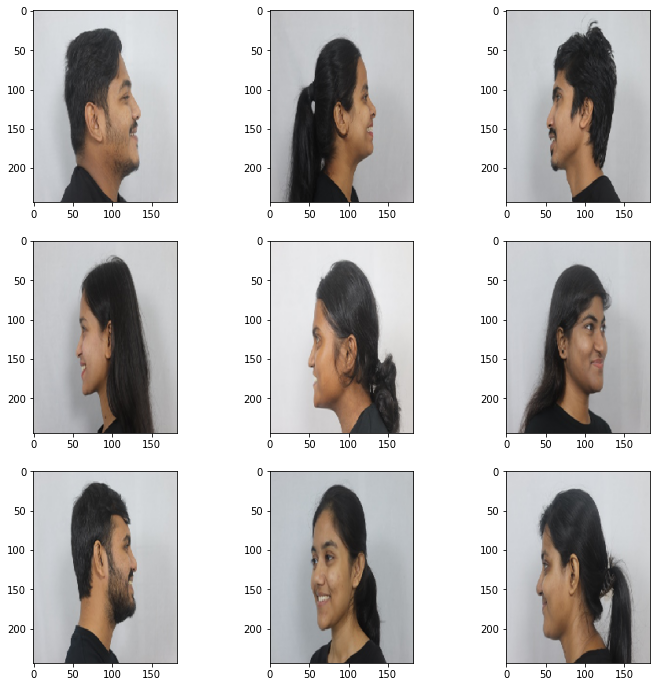

In [24]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"Train/"+expression+"/"+
                  os.listdir(folder_path + "Train/" + expression)[i], target_size=(244, 183))
    plt.imshow(img)   
plt.show()

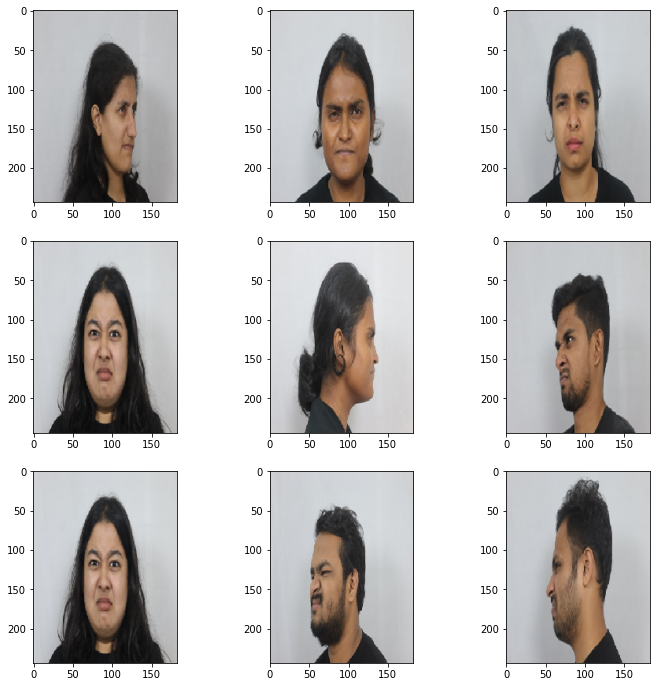

In [25]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"Train/"+expression+"/"+
                  os.listdir(folder_path + "Train/" + expression)[i], target_size=(244, 183))
    plt.imshow(img)   
plt.show()

In [30]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"Train",
                                            target_size=(244,183),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"Test",
                                       target_size=(244,183),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 4900 images belonging to 7 classes.
Found 2110 images belonging to 7 classes.


In [31]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(244,183,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 244, 183, 64)      640       
                                                                 
 batch_normalization_12 (Bat  (None, 244, 183, 64)     256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 244, 183, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 122, 91, 64)      0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 122, 91, 64)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 122, 91, 128)     

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 30

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [33]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-33-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/30
38/38 [==============================] - ETA: 0s - loss: 2.0618 - accuracy: 0.2239 

38/38 [==============================] - 2581s 69s/step - loss: 2.0618 - accuracy: 0.2239 - val_loss: 11.0460 - val_accuracy: 0.1465 - lr: 0.0010
Epoch 2/30
38/38 [==============================] - ETA: 0s - loss: 1.5819 - accuracy: 0.3963

38/38 [==============================] - 61s 2s/step - loss: 1.5819 - accuracy: 0.3963 - val_loss: 8.8534 - val_accuracy: 0.1782 - lr: 0.0010
Epoch 3/30
38/38 [==============================] - ETA: 0s - loss: 1.1514 - accuracy: 0.5539

38/38 [==============================] - 57s 1s/step - loss: 1.1514 - accuracy: 0.5539 - val_loss: 3.4431 - val_accuracy: 0.2979 - lr: 0.0010
Epoch 4/30
38/38 [==============================] - ETA: 0s - loss: 0.8240 - accuracy: 0.6848

38/38 [==============================] - 61s 2s/step - loss: 0.8240 - accuracy: 0.6848 - val_loss: 2.6761 - val_accuracy: 0.4565 - lr: 0.0010
Epoch 5/30
38/38 [==============================] - ETA: 0s - loss: 0.6071 - accuracy: 0.7743

38/38 [==============================] - 58s 2s/step - loss: 0.6071 - accuracy: 0.7743 - val_loss: 1.7127 - val_accuracy: 0.5371 - lr: 0.0010
Epoch 6/30
38/38 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8472

38/38 [==============================] - 61s 2s/step - loss: 0.4427 - accuracy: 0.8472 - val_loss: 1.9140 - val_accuracy: 0.5347 - lr: 0.0010
Epoch 7/30
38/38 [==============================] - ETA: 0s - loss: 0.3190 - accuracy: 0.8889

38/38 [==============================] - 57s 2s/step - loss: 0.3190 - accuracy: 0.8889 - val_loss: 2.0650 - val_accuracy: 0.5400 - lr: 0.0010
Epoch 8/30
38/38 [==============================] - ETA: 0s - loss: 0.2300 - accuracy: 0.9311

38/38 [==============================] - 61s 2s/step - loss: 0.2300 - accuracy: 0.9311 - val_loss: 0.4995 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 9/30
38/38 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9499

38/38 [==============================] - 62s 2s/step - loss: 0.1665 - accuracy: 0.9499 - val_loss: 1.0421 - val_accuracy: 0.6797 - lr: 0.0010
Epoch 10/30
38/38 [==============================] - ETA: 0s - loss: 0.1285 - accuracy: 0.9602

38/38 [==============================] - 58s 2s/step - loss: 0.1285 - accuracy: 0.9602 - val_loss: 0.3397 - val_accuracy: 0.8721 - lr: 0.0010
Epoch 11/30
38/38 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9669

38/38 [==============================] - 57s 1s/step - loss: 0.1102 - accuracy: 0.9669 - val_loss: 0.5345 - val_accuracy: 0.8018 - lr: 0.0010
Epoch 12/30
38/38 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9681

38/38 [==============================] - 62s 2s/step - loss: 0.1087 - accuracy: 0.9681 - val_loss: 1.6186 - val_accuracy: 0.5293 - lr: 0.0010
Epoch 13/30
38/38 [==============================] - ETA: 0s - loss: 0.1022 - accuracy: 0.9669

38/38 [==============================] - 58s 2s/step - loss: 0.1022 - accuracy: 0.9669 - val_loss: 0.1664 - val_accuracy: 0.9448 - lr: 0.0010
Epoch 14/30
38/38 [==============================] - ETA: 0s - loss: 0.0695 - accuracy: 0.9790

38/38 [==============================] - 61s 2s/step - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.1665 - val_accuracy: 0.9438 - lr: 0.0010
Epoch 15/30
38/38 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9851

38/38 [==============================] - 57s 1s/step - loss: 0.0512 - accuracy: 0.9851 - val_loss: 0.2235 - val_accuracy: 0.9292 - lr: 0.0010
Epoch 16/30
38/38 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9855Restoring model weights from the end of the best epoch: 13.



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
38/38 [==============================] - 62s 2s/step - loss: 0.0538 - accuracy: 0.9855 - val_loss: 0.1836 - val_accuracy: 0.9404 - lr: 0.0010
Epoch 16: early stopping


In [34]:
model.save_weights('model.h5')

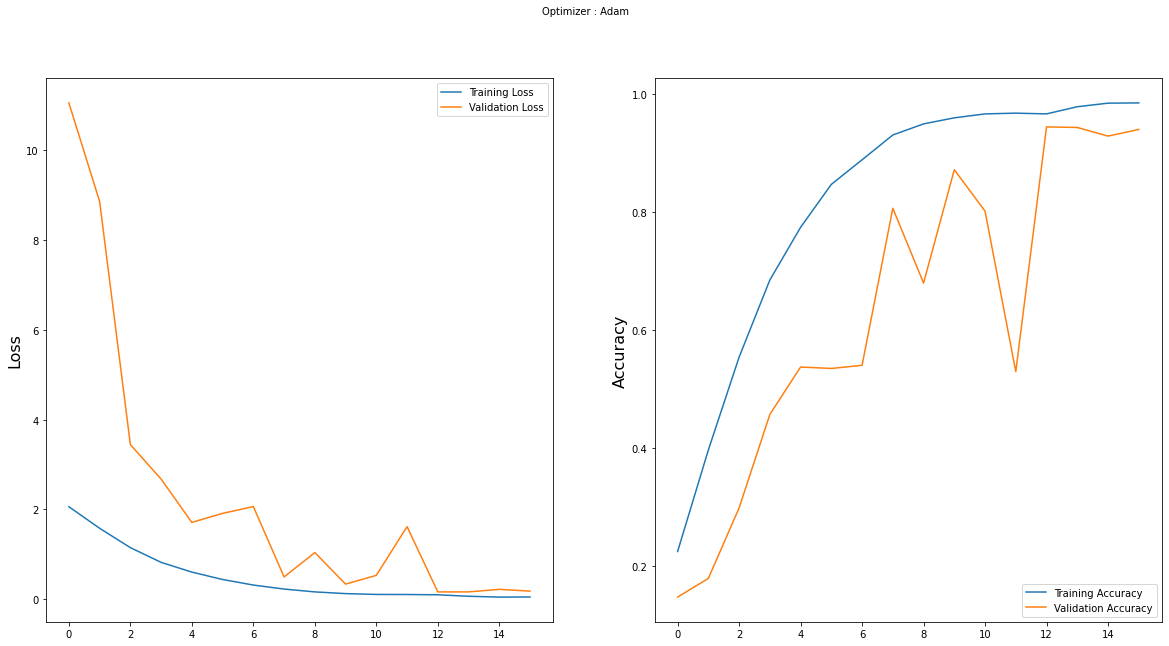

In [36]:
# plt.style.use('white_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()